<a href="https://colab.research.google.com/github/diegorrojas/SeriesDeTiempo-Tec/blob/main/Tarea1_Seriestiempo_A01721803.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [44]:
tipo_cambio = pd.read_csv('/content/drive/MyDrive/tipo_cambio_excel.csv')

In [45]:
tipo_cambio

,date,adj_close
0,07/03/22,20.969259
1,08/03/22,21.305349
2,09/03/22,21.362391
3,10/03/22,20.905190
4,11/03/22,20.912001
...,...,...
257,01/03/23,18.300940
258,02/03/23,18.115971
259,03/03/23,18.105301
260,06/03/23,17.978001


In [46]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [47]:
plt.rcParams['figure.figsize']=[12,6]

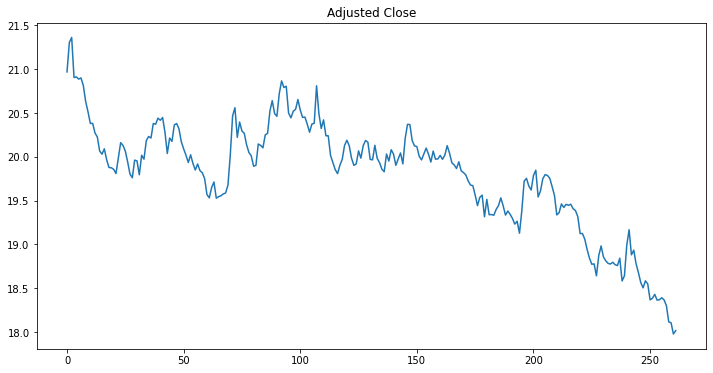

In [48]:
tipo_cambio['adj_close'].plot()
plt.title('Adjusted Close')
plt.show()

In [49]:
tipo_cambio['cambio_diff'] = tipo_cambio['adj_close'].diff()

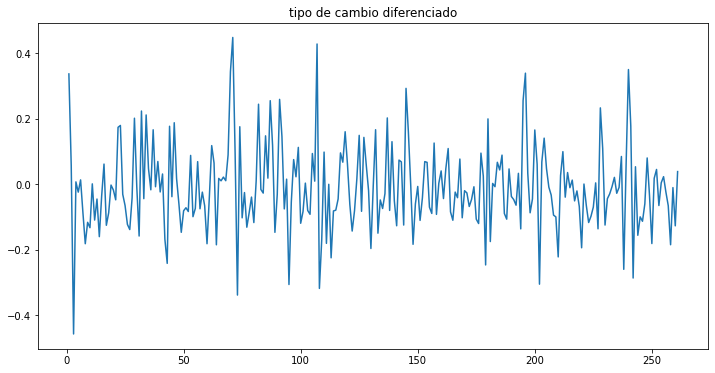

In [50]:
tipo_cambio['cambio_diff'].plot()
plt.title('tipo de cambio diferenciado')
plt.show()

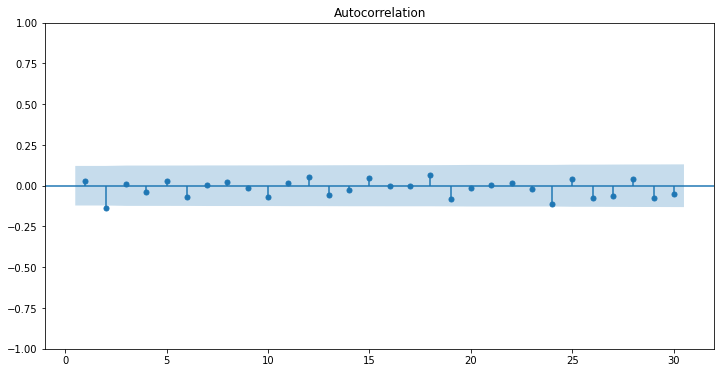

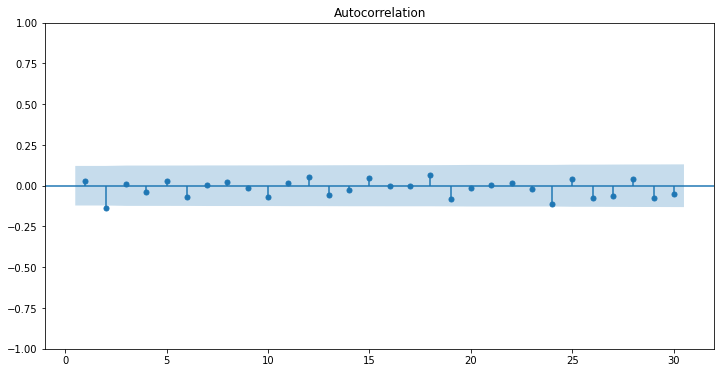

In [51]:
plot_acf(tipo_cambio['cambio_diff'].dropna(), zero= False, lags= 30)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


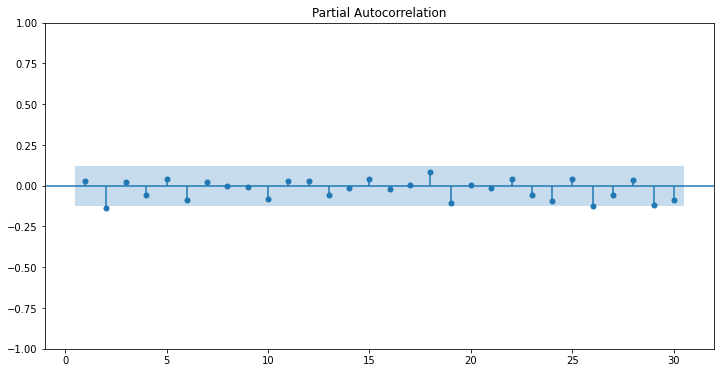

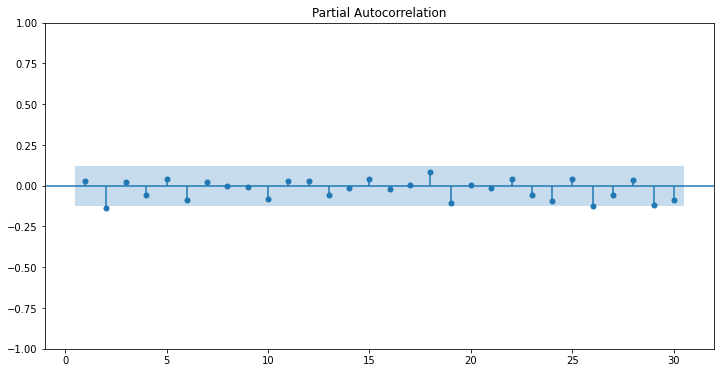

In [52]:
plot_pacf(tipo_cambio['cambio_diff'].dropna(), zero= False, lags= 30)

In [37]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(tipo_cambio['cambio_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3
AR: 3, MA: 4
AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2
AR: 4, MA: 3
AR: 4, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC         BIC
AR MA                        
0  0   912.384817  919.521506
   1   890.162382  900.867415
   2   881.495351  895.768729
   3   882.433164  900.274886
   4   883.139578  904.549645
1  0   884.177710  894.882744
   1   884.745096  899.018474
   2   882.355286  900.197008
   3   884.678727  906.088794
   4   886.569985  911.548396
2  0   882.674643  896.948021
   1   884.663946  902.505668
   2   888.461140  909.871207
   3   885.395827  910.374239
   4   888.233930  916.780686
3  0   884.644105  902.485828
   1   885.367277  906.777344
   2   884.761153  909.739565
   3   886.371934  914.918690
   4   888.021126  920.136226
4  0   884.478973  905.889040
   1   885.040563  910.018975
   2   886.315651  914.862407
   3   888.247517  920.362618
   4   884.988850  920.672295

In [53]:
ic.sort_values('AIC', ascending = True)

,,AIC,BIC
AR,MA,,
0,2,881.495351,895.768729
1,2,882.355286,900.197008
0,3,882.433164,900.274886
2,0,882.674643,896.948021
0,4,883.139578,904.549645
1,0,884.177710,894.882744
4,0,884.478973,905.889040
3,0,884.644105,902.485828
2,1,884.663946,902.505668


El mejor modelo es MA(2)

In [54]:
modelo1 = ARIMA(tipo_cambio['cambio_diff'].dropna(), order=(0, 0, 2)) 
resultado1 = modelo1.fit()
print(resultado1.summary() ) 

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            cambio_diff   No. Observations:                  261
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 166.568
Date:                Fri, 10 Mar 2023   AIC                           -325.135
Time:                        14:18:08   BIC                           -310.877
Sample:                             0   HQIC                          -319.404
                                - 261                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0114      0.008     -1.484      0.138      -0.027       0.004
ma.L1          0.0410      0.051      0.797      0.426      -0.060       0.142
ma.L2         -0.1613      0.055     -2.927      0.0

In [55]:
tipo_cambio['cambio_pronostico'] = resultado1.predict()

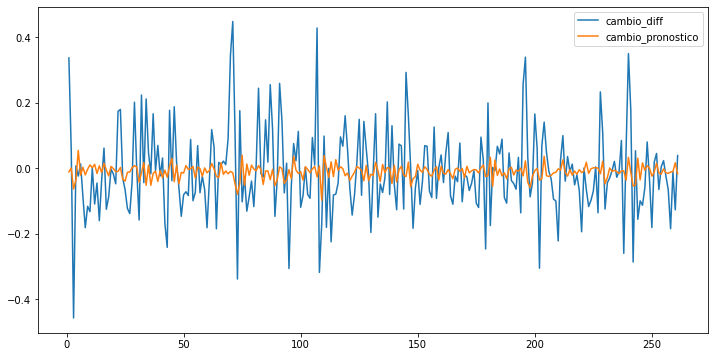

In [56]:
tipo_cambio[['cambio_diff','cambio_pronostico']].plot();

In [24]:
modelo2 = ARIMA(tipo_cambio['adj_close'], order =(0,1,2))
resultado2 = modelo2.fit()
print(resultado2.summary()) 

                               SARIMAX Results                                
Dep. Variable:              adj_close   No. Observations:                  262
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 165.268
Date:                Fri, 10 Mar 2023   AIC                           -324.536
Time:                        14:07:29   BIC                           -313.843
Sample:                             0   HQIC                          -320.238
                                - 262                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0527      0.052      1.020      0.308      -0.049       0.154
ma.L2         -0.1482      0.054     -2.725      0.006      -0.255      -0.042
sigma2         0.0165      0.001     13.925      0.0

In [57]:
tipo_cambio['cambio_pronostico2'] = resultado2.predict()

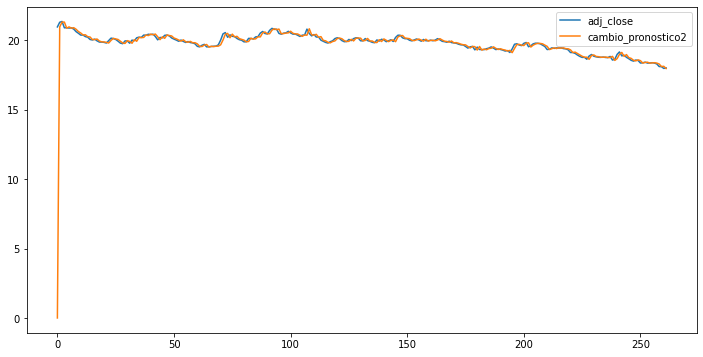

In [70]:
tipo_cambio[['adj_close','cambio_pronostico2']].plot(); 

In [68]:
tipo_cambio.iloc[0]['cambio_pronostico2'] = tipo_cambio.iloc[0][ 'adj_close']

/usr/local/lib/python3.9/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [69]:
tipo_cambio[['adj_close','cambio_pronostico']]

,adj_close,cambio_pronostico
0,20.969259,NaN
1,21.305349,-0.011437
2,21.362391,0.000202
3,20.905190,-0.063774
4,20.912001,-0.036356
...,...,...
257,18.300940,-0.015909
258,18.115971,-0.011810
259,18.105301,-0.010470
260,17.978001,0.016484


In [62]:
tipo_cambio.describe()

,adj_close,cambio_diff,cambio_pronostico,cambio_pronostico2
count,262.000000,261.000000,261.000000,262.000000
mean,19.794396,-0.011314,-0.011529,19.726737
std,0.633150,0.129562,0.021254,1.372361
min,17.978001,-0.457201,-0.098006,0.000000
25%,19.457900,-0.087499,-0.023852,19.462195
50%,19.933350,-0.024432,-0.009605,19.933630
75%,20.184875,0.059361,0.000909,20.168660
max,21.362391,0.447340,0.053734,21.320067


In [64]:
tipo_cambio.tail()

,date,adj_close,cambio_diff,cambio_pronostico,cambio_pronostico2
257,01/03/23,18.300940,-0.065959,-0.015909,18.363768
258,02/03/23,18.115971,-0.184969,-0.011810,18.301128
259,03/03/23,18.105301,-0.010670,-0.010470,18.115529
260,06/03/23,17.978001,-0.127300,0.016484,18.132210
261,07/03/23,18.016199,0.038198,-0.017305,17.971392


In [66]:
resultado2.predict(261,264)

261    17.971392
262    18.041420
263    18.034778
264    18.034778
Name: predicted_mean, dtype: float64

Se pronostica un tipo de cambio de 18.04